In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

model = tf.keras.models.load_model('saved_model/09_13_model')
indoor = 'test/indoor'
outdoor = 'test/outdoor'

In [15]:
list_indoor_path = os.listdir(indoor)
list_outdoor_path = os.listdir(outdoor)

In [11]:
def func(path, label):
    np_img = np.array(Image.open(path))
#     print(np_img.shape)
    img = (np.expand_dims(tf.image.resize(np_img, [200, 150]), 0))
    prediction_result = ''
#     print(img.shape)
    predictions_single = model.predict(img)
    if predictions_single[0][0] == 0.0:
        prediction_result = "indoor"
    else:
        prediction_result = "outdoor"

    if prediction_result != label:
        plt.figure()
        plt.imshow(np_img)
#     plt.colorbar()
        plt.grid(False)
        plt.xlabel(prediction_result)
        plt.show()
    return prediction_result

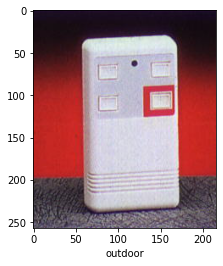

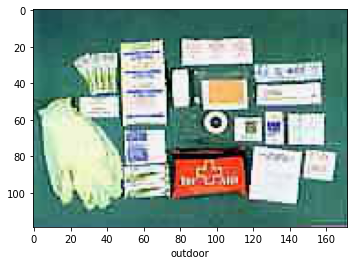

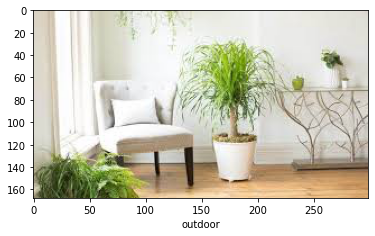

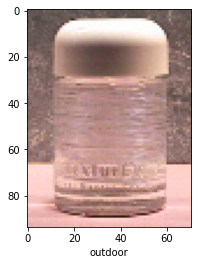

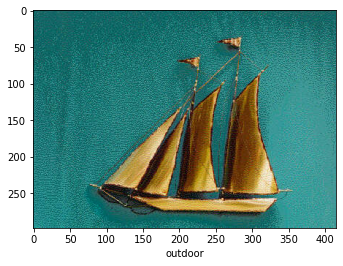

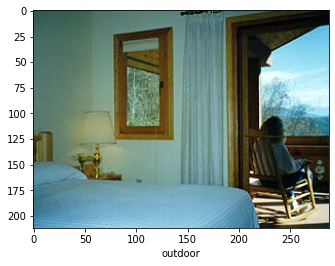

accuracy of classifying indoor image = 80.0%


In [17]:
count_correct_indoor = 0
for path in list_indoor_path:
    result = func('./test/indoor/' + path, 'indoor')
    if result == 'indoor':
        count_correct_indoor += 1
        
indoor_accuracy = count_correct_indoor/len(list_indoor_path)
print("accuracy of classifying indoor image = " + str(indoor_accuracy*100) + "%")

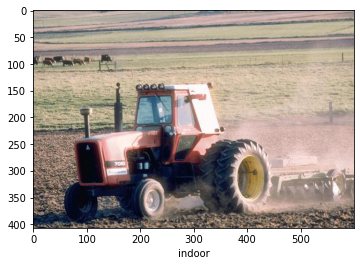

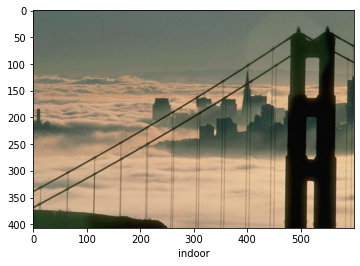

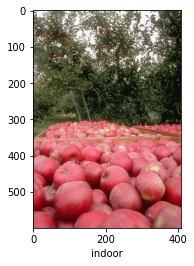

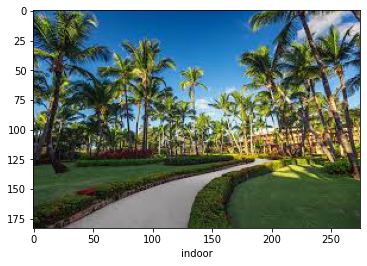

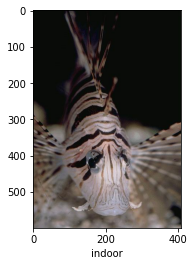

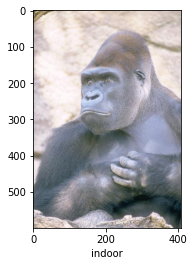

accuracy of classifying indoor image = 85.29411764705883%


In [4]:
for i,photo in enumerate(os.listdir(outdoor)):
    path = os.path.join(outdoor,photo).replace('\\','/')
    result = func(path, 'outdoor')
    if result == 'outdoor':
        count_correct_outdoor += 1
outdoor_accuracy = count_correct_outdoor/i
print("accuracy of classifying outdoor image = " + str(outdoor_accuracy*100) + "%")